In [1]:
# Importing the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd # Importing the dataset 
import pyreadstat

# Read the sas7bdat file
df, meta = pyreadstat.read_sas7bdat('data5.sas7bdat')

In [2]:
df

,NUM,HT_CNT_1,HT_CNT_2,MCARE_DCNT,MDTN_DCNT1,TOT_AMT,TOT_ORAMT,TOT_ORAMT_1,TOT_AMT_1,HT_CNT_1_1,...,AGEg,HT_CNT_1g,HT_CNT_2g,MCARE_DCNTg,TOT_AMT_1g,TOT_AMT_2g,TOT_AMT_2_1g,CNT_GROUP,AMT_GROUP,missing
0,12.0,60.0,9.0,127.0,292.0,23127150.0,22877440.0,249710.0,22294360.0,22058150.0,...,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN
1,19.0,31.0,61.0,1015.0,1096.0,16994350.0,15650590.0,1343760.0,10878060.0,9588300.0,...,3.0,2.0,1.0,2.0,2.0,1.0,2.0,4.0,4.0,NaN
2,34.0,65.0,325.0,1981.0,2353.0,26630440.0,26025630.0,604810.0,9657540.0,9365940.0,...,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,NaN
3,61.0,3.0,399.0,1596.0,1967.0,16084090.0,16043750.0,40340.0,1261130.0,1258790.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,NaN
4,71.0,378.0,13.0,213.0,671.0,103661970.0,102690630.0,971340.0,102651160.0,101702820.0,...,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,211142.0,96.0,60.0,688.0,1106.0,18208050.0,17855780.0,354270.0,12833070.0,12549940.0,...,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN
10864,211152.0,147.0,74.0,603.0,924.0,16974660.0,16469580.0,505080.0,12518200.0,12067320.0,...,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN
10865,211246.0,366.0,0.0,0.0,366.0,17124580.0,17124580.0,0.0,17124580.0,17124580.0,...,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN
10866,211273.0,25.0,100.0,1874.0,2048.0,21773210.0,21334770.0,438440.0,12905870.0,12524430.0,...,3.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,4.0,NaN


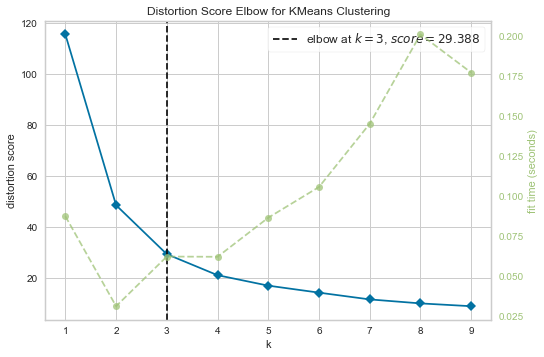

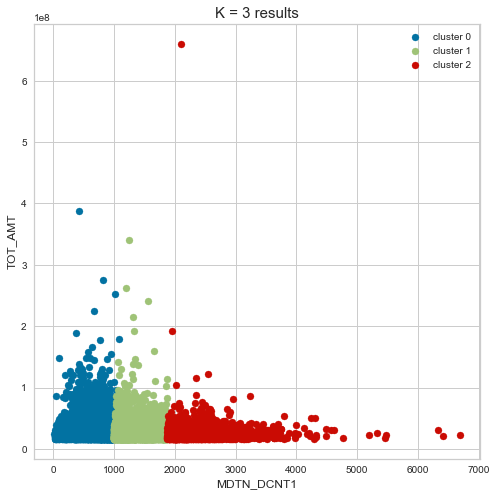

12.0 1076.0
992.0 1876.0
1876.0 6693.0


In [46]:
###################### 1. 총 진료비 vs 급여일수 ######################

from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['MDTN_DCNT1', 'TOT_AMT']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

# elbow plot으로 적절한 k개수 선택
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data_scale)
visualizer.show()

from sklearn.cluster import KMeans

k=3

model = KMeans(n_clusters= k, init = 'k-means++', random_state = 13)
df['cluster'] = model.fit_predict(data_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'MDTN_DCNT1'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('MDTN_DCNT1', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MIN_MDTN0 = min(df[df['cluster']==0]['MDTN_DCNT1'])
MAX_MDTN0 = max(df[df['cluster']==0]['MDTN_DCNT1'])
MIN_MDTN1 = min(df[df['cluster']==1]['MDTN_DCNT1'])
MAX_MDTN1 = max(df[df['cluster']==1]['MDTN_DCNT1'])
MIN_MDTN2 = min(df[df['cluster']==2]['MDTN_DCNT1'])
MAX_MDTN2 = max(df[df['cluster']==2]['MDTN_DCNT1'])


print(MIN_MDTN0,MAX_MDTN0)
print(MIN_MDTN1,MAX_MDTN1)
print(MIN_MDTN2,MAX_MDTN2)

## 결론 = 1그룹 : 급여일수 < 992~1076 , 2그룹 : 992~1076 < 급여일수 < 1876 , 3그룹 : 급여일수 > 1876 


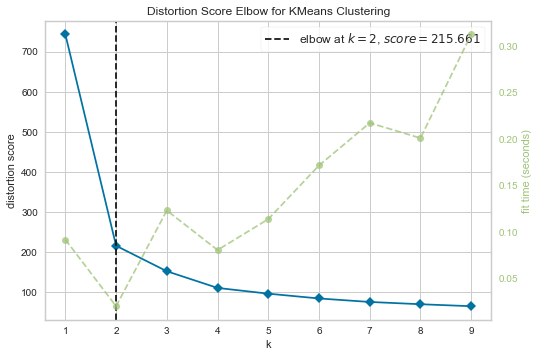

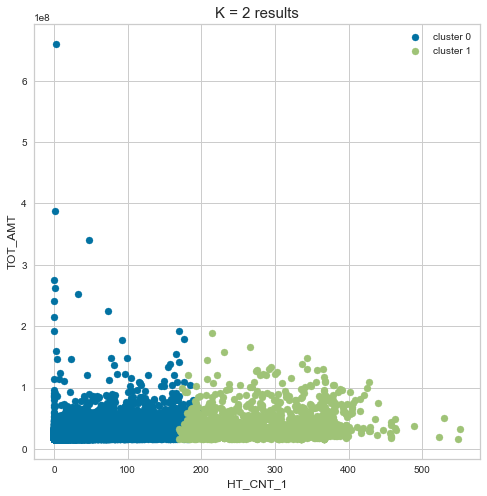

0.0 202.0
170.0 551.0


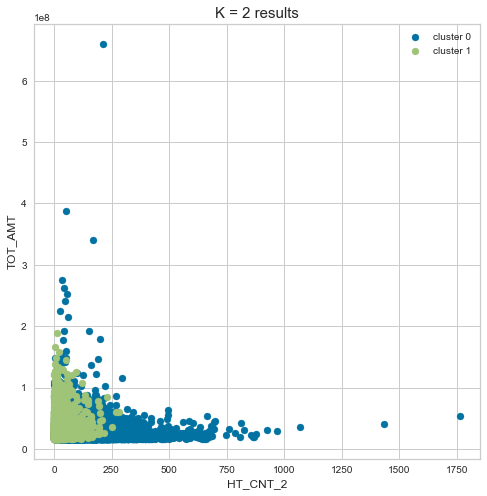

0.0 1764.0
0.0 283.0


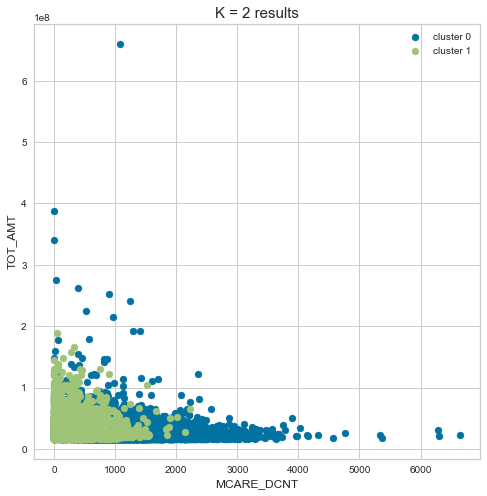

0.0 6645.0
0.0 2222.0


In [58]:
###################### 2. 총 진료비 vs 외래,입원,투약일수 ######################

from sklearn.preprocessing import MinMaxScaler

# 4 가지 feature를 대상
data = df[['TOT_AMT', 'HT_CNT_1', 'HT_CNT_2', 'MCARE_DCNT']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

# elbow plot으로 적절한 k개수 선택
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data_scale)
visualizer.show()

from sklearn.cluster import KMeans

k=2

model = KMeans(n_clusters= k, init = 'k-means++', random_state = 13)
df['cluster'] = model.fit_predict(data_scale)


# plot 1 총 진료비 vs 입원일수
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'HT_CNT_1'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('HT_CNT_1', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MINHT_CNT_1_0 = min(df[df['cluster']==0]['HT_CNT_1'])
MAXHT_CNT_1_0 = max(df[df['cluster']==0]['HT_CNT_1'])
MINHT_CNT_1_1 = min(df[df['cluster']==1]['HT_CNT_1'])
MAXHT_CNT_1_1 = max(df[df['cluster']==1]['HT_CNT_1'])

print(MINHT_CNT_1_0,MAXHT_CNT_1_0)
print(MINHT_CNT_1_1,MAXHT_CNT_1_1)

## plot1 결론 = 1그룹 : 입원일수 < 170~202 , 2그룹 : 입원일수 > 170~202


# plot 2 총 진료비 vs 외래일수
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'HT_CNT_2'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('HT_CNT_2', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MINHT_CNT_2_0 = min(df[df['cluster']==0]['HT_CNT_2'])
MAXHT_CNT_2_0 = max(df[df['cluster']==0]['HT_CNT_2'])
MINHT_CNT_2_1 = min(df[df['cluster']==1]['HT_CNT_2'])
MAXHT_CNT_2_1 = max(df[df['cluster']==1]['HT_CNT_2'])

print(MINHT_CNT_2_0,MAXHT_CNT_2_0)
print(MINHT_CNT_2_1,MAXHT_CNT_2_1)

## 결론 = 1그룹 : 외래일수 < 0~283 , 2그룹 : 외래일수 > 0~283


# plot 3 총 진료비 vs 투약일수
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'MCARE_DCNT'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('MCARE_DCNT', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MINMCARE_DCNT_0 = min(df[df['cluster']==0]['MCARE_DCNT'])
MAXMCARE_DCNT_0 = max(df[df['cluster']==0]['MCARE_DCNT'])
MINMCARE_DCNT_1 = min(df[df['cluster']==1]['MCARE_DCNT'])
MAXMCARE_DCNT_1 = max(df[df['cluster']==1]['MCARE_DCNT'])

print(MINMCARE_DCNT_0,MAXMCARE_DCNT_0)
print(MINMCARE_DCNT_1,MAXMCARE_DCNT_1)

## 결론 = 1그룹 : 투약일수 < 0~2222 , 2그룹 : 투약일수 > 0~2222


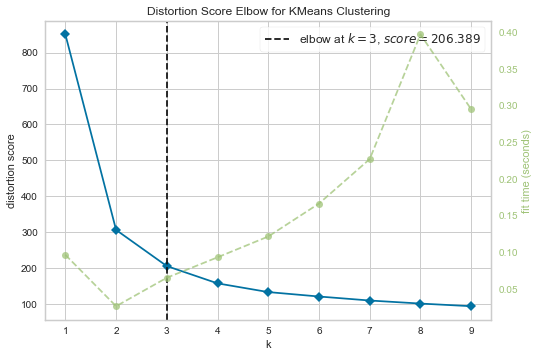

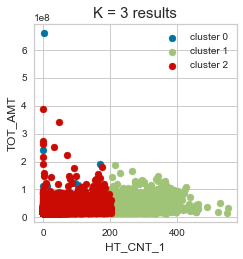

0.0 211.0
185.0 551.0
0.0 204.0


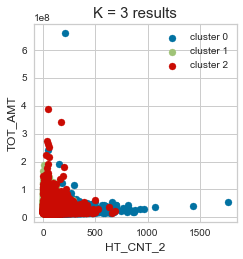

16.0 1764.0
0.0 283.0
0.0 685.0


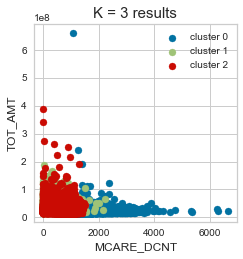

0.0 6645.0
0.0 2222.0
0.0 1525.0


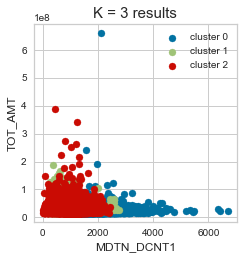

1220.0 6693.0
197.0 2776.0
12.0 2419.0


In [59]:
###################### 3. 총 진료비 vs 외래,입원,투약,급여일수 ######################

from sklearn.preprocessing import MinMaxScaler

# 4 가지 feature를 대상
data = df[['TOT_AMT', 'HT_CNT_1', 'HT_CNT_2', 'MCARE_DCNT','MDTN_DCNT1']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

# elbow plot으로 적절한 k개수 선택
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data_scale)
visualizer.show()

from sklearn.cluster import KMeans

k=3

model = KMeans(n_clusters= k, init = 'k-means++', random_state = 13)
df['cluster'] = model.fit_predict(data_scale)


# plot 1 총 진료비 vs 입원일수
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.subplot(2,2,1)
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'HT_CNT_1'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('HT_CNT_1', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MINHT_CNT_1_0 = min(df[df['cluster']==0]['HT_CNT_1'])
MAXHT_CNT_1_0 = max(df[df['cluster']==0]['HT_CNT_1'])
MINHT_CNT_1_1 = min(df[df['cluster']==1]['HT_CNT_1'])
MAXHT_CNT_1_1 = max(df[df['cluster']==1]['HT_CNT_1'])
MINHT_CNT_1_2 = min(df[df['cluster']==2]['HT_CNT_1'])
MAXHT_CNT_1_2 = max(df[df['cluster']==2]['HT_CNT_1'])

print(MINHT_CNT_1_0,MAXHT_CNT_1_0)
print(MINHT_CNT_1_1,MAXHT_CNT_1_1)
print(MINHT_CNT_1_2,MAXHT_CNT_1_2)

## 결론


# plot 2 총 진료비 vs 외래일수
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.subplot(2,2,2)
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'HT_CNT_2'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('HT_CNT_2', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MINHT_CNT_2_0 = min(df[df['cluster']==0]['HT_CNT_2'])
MAXHT_CNT_2_0 = max(df[df['cluster']==0]['HT_CNT_2'])
MINHT_CNT_2_1 = min(df[df['cluster']==1]['HT_CNT_2'])
MAXHT_CNT_2_1 = max(df[df['cluster']==1]['HT_CNT_2'])
MINHT_CNT_2_2 = min(df[df['cluster']==2]['HT_CNT_2'])
MAXHT_CNT_2_2 = max(df[df['cluster']==2]['HT_CNT_2'])

print(MINHT_CNT_2_0,MAXHT_CNT_2_0)
print(MINHT_CNT_2_1,MAXHT_CNT_2_1)
print(MINHT_CNT_2_2,MAXHT_CNT_2_2)

## 결론 


# plot 3 총 진료비 vs 투약일수
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.subplot(2,2,3)
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'MCARE_DCNT'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('MCARE_DCNT', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MINMCARE_DCNT_0 = min(df[df['cluster']==0]['MCARE_DCNT'])
MAXMCARE_DCNT_0 = max(df[df['cluster']==0]['MCARE_DCNT'])
MINMCARE_DCNT_1 = min(df[df['cluster']==1]['MCARE_DCNT'])
MAXMCARE_DCNT_1 = max(df[df['cluster']==1]['MCARE_DCNT'])
MINMCARE_DCNT_2 = min(df[df['cluster']==2]['MCARE_DCNT'])
MAXMCARE_DCNT_2 = max(df[df['cluster']==2]['MCARE_DCNT'])

print(MINMCARE_DCNT_0,MAXMCARE_DCNT_0)
print(MINMCARE_DCNT_1,MAXMCARE_DCNT_1)
print(MINMCARE_DCNT_2,MAXMCARE_DCNT_2)

## 결론 


# plot 4 총 진료비 vs 급여일수
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.subplot(2,2,4)
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'MDTN_DCNT1'], df.loc[df['cluster'] == i, 'TOT_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('MDTN_DCNT1', size = 12)
plt.ylabel('TOT_AMT', size = 12)
plt.show()


# finding cut-points
MINMDTN_DCNT1_0 = min(df[df['cluster']==0]['MDTN_DCNT1'])
MAXMDTN_DCNT1_0 = max(df[df['cluster']==0]['MDTN_DCNT1'])
MINMDTN_DCNT1_1 = min(df[df['cluster']==1]['MDTN_DCNT1'])
MAXMDTN_DCNT1_1 = max(df[df['cluster']==1]['MDTN_DCNT1'])
MINMDTN_DCNT1_2 = min(df[df['cluster']==2]['MDTN_DCNT1'])
MAXMDTN_DCNT1_2 = max(df[df['cluster']==2]['MDTN_DCNT1'])

print(MINMDTN_DCNT1_0,MAXMDTN_DCNT1_0)
print(MINMDTN_DCNT1_1,MAXMDTN_DCNT1_1)
print(MINMDTN_DCNT1_2,MAXMDTN_DCNT1_2)

## 결론 